# Jornada Site C experiments
## Import libraries

In [1]:
from utils.data import Data
from utils.estimators import Dataset, Classifier
%matplotlib inline
import numpy as np
np.random.seed(7)

## Read pre harvest data

In [2]:
pre_tiff_filename = "./Sergio/Images/JOR_C_Pre_6Band_Ortho_26913_5cm_NAD83_MaxLike_Super_TrainingSample_Final.tif"
pre_shp_filename = "./Sergio/Labels/JOR_C_Pre_6Band_Ortho_26913_5cm_NAD83_MaxLike_Super_TrainingSample_Final.shp"

pre_data = Data(pre_tiff_filename, pre_shp_filename, classes = ['Shrub', 'Graminoid', 'Bare Ground', 'Shade', 'Other'])
pre_tiff = pre_data.read_tiff()
pre_mask = pre_data.get_mask(column="Classname")

/home/mibook/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


## Read post harvest data

In [3]:
post_tiff_filename = "./Sergio/Images/JOR_C_Post_6Band_Ortho_26913_5cm_NAD83_MaxLike_Super_TrainingSample_Final.tif"
post_shp_filename = "./Sergio/Labels/JOR_C_Post_6Band_Ortho_26913_5cm_NAD83_MaxLike_Super_TrainingSample_Final.shp"

post_data = Data(post_tiff_filename, post_shp_filename, classes = ['Shrub', 'Graminoid', 'Bare Ground', 'Shade', 'Other'])
post_tiff = post_data.read_tiff()
post_mask = post_data.get_mask(column="Classname")

## View data masks pre and post harvest

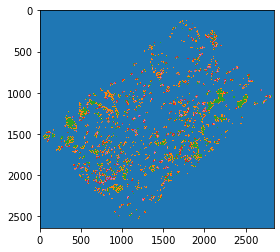

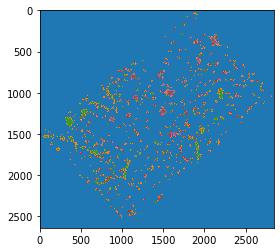

In [4]:
pre_data.view_mask(np.argmax(pre_mask, axis=2))
post_data.view_mask(np.argmax(post_mask, axis=2))

## Build pre harvest dataset

In [5]:
pre_X, pre_y = pre_data.get_Xy(pre_tiff, pre_mask, n_sample = 20000, save=False)
pre_X_train, pre_X_test, pre_y_train, pre_y_test = pre_data.train_test_split(pre_X, pre_y, save=False)
pre_classifier = Classifier(savepath = "./outputs_sergio/pre",
                        bands = ["B1","B2","B3","B4","B5","B6"])
pre_dataset = Dataset(pre_X_train, pre_X_test, pre_y_train, pre_y_test, 
                      classes = ['Shrub', 'Graminoid', 'Bare Ground', 'Shade', 'Other'])
pre_dataset.info()

No. of classes: 5
Class labels: ['Shrub', 'Graminoid', 'Bare Ground', 'Shade', 'Other']
Total data samples: 5795
Train samples: 4346
	 0:Shrub = 847
	 4:Other = 875
	 1:Graminoid = 872
	 2:Bare Ground = 868
	 3:Shade = 884
Test stats: 1449
	 4:Other = 284
	 0:Shrub = 312
	 3:Shade = 275
	 1:Graminoid = 287
	 2:Bare Ground = 291


## Train random forest classifier, pre harvest


Random Forest
Elapsed_time training  0.579895 
Accuracy on train Set: 
0.892774965485504
Accuracy on Test Set: 
0.8391994478951
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       312
           1       0.74      0.60      0.66       287
           2       0.70      0.86      0.77       291
           3       0.86      0.90      0.88       275
           4       0.95      0.88      0.91       284

    accuracy                           0.84      1449
   macro avg       0.84      0.84      0.84      1449
weighted avg       0.84      0.84      0.84      1449

Confusion Matrix: 
[[295   6   0  11   0]
 [  3 172 102   8   2]
 [  0  32 251   1   7]
 [ 11  12   0 248   4]
 [  0   9   5  20 250]]


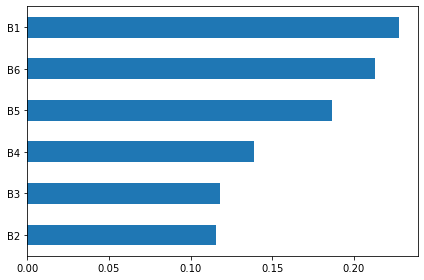

In [6]:
_ = pre_classifier.random_forest(trainX=pre_dataset.trainX, trainY=pre_dataset.trainY, 
                         testX=pre_dataset.testX, testY=pre_dataset.testY, 
                         grid_search=False, train=True, 
                         n_estimators = 100, max_depth=10, 
                         feature_importance=True)

## Build post harvest dataset

In [7]:
post_X, post_y = post_data.get_Xy(post_tiff, post_mask, n_sample = 20000, save=False)
post_X_train, post_X_test, post_y_train, post_y_test = post_data.train_test_split(post_X, post_y, save=False)
post_classifier = Classifier(savepath = "./outputs_sergio/post",
                        bands = ["B1","B2","B3","B4","B5","B6"])
post_dataset = Dataset(post_X_train, post_X_test, post_y_train, post_y_test, 
                      classes = ['Shrub', 'Graminoid', 'Bare Ground', 'Shade', 'Other'])
post_dataset.info()

No. of classes: 5
Class labels: ['Shrub', 'Graminoid', 'Bare Ground', 'Shade', 'Other']
Total data samples: 5525
Train samples: 4143
	 2:Bare Ground = 834
	 1:Graminoid = 835
	 3:Shade = 850
	 0:Shrub = 795
	 4:Other = 829
Test stats: 1382
	 1:Graminoid = 270
	 2:Bare Ground = 271
	 0:Shrub = 310
	 4:Other = 276
	 3:Shade = 255


## Train random forest classifier, post harvest


Random Forest
Elapsed_time training  0.534237 
Accuracy on train Set: 
0.8880038619357953
Accuracy on Test Set: 
0.8198263386396527
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       310
           1       0.62      0.60      0.61       270
           2       0.64      0.72      0.68       271
           3       0.87      0.93      0.90       255
           4       0.99      0.91      0.95       276

    accuracy                           0.82      1382
   macro avg       0.82      0.82      0.82      1382
weighted avg       0.83      0.82      0.82      1382

Confusion Matrix: 
[[288   8   0  14   0]
 [  1 162  98   9   0]
 [  0  69 195   7   0]
 [  1  11   4 237   2]
 [  0  13   6   6 251]]


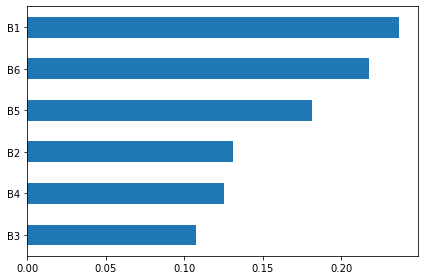

In [8]:
_ = post_classifier.random_forest(trainX=post_dataset.trainX, trainY=post_dataset.trainY, 
                         testX=post_dataset.testX, testY=post_dataset.testY, 
                         grid_search=False, train=True, 
                         n_estimators = 100, max_depth=10, 
                         feature_importance=True)

## Using all pre-harvest classes for training and all post-harvest for testing

In [9]:
pre_post_classifier = Classifier(savepath = "./outputs_sergio/cross_pre_post",
                        bands = ["B1","B2","B3","B4","B5","B6"])
pre_post_dataset = Dataset(pre_X, post_X, pre_y, post_y, 
                      classes = ['Shrub', 'Graminoid', 'Bare Ground', 'Shade', 'Other'])
pre_post_dataset.info()

No. of classes: 5
Class labels: ['Shrub', 'Graminoid', 'Bare Ground', 'Shade', 'Other']
Total data samples: 11320
Train samples: 5795
	 0:Shrub = 1159
	 1:Graminoid = 1159
	 2:Bare Ground = 1159
	 3:Shade = 1159
	 4:Other = 1159
Test stats: 5525
	 0:Shrub = 1105
	 1:Graminoid = 1105
	 2:Bare Ground = 1105
	 3:Shade = 1105
	 4:Other = 1105



Random Forest
Elapsed_time training  0.713110 
Accuracy on train Set: 
0.8919758412424504
Accuracy on Test Set: 
0.7695927601809954
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1105
           1       0.53      0.68      0.60      1105
           2       0.65      0.46      0.53      1105
           3       0.91      0.89      0.90      1105
           4       0.82      0.93      0.87      1105

    accuracy                           0.77      5525
   macro avg       0.78      0.77      0.77      5525
weighted avg       0.78      0.77      0.77      5525

Confusion Matrix: 
[[ 981   76    0   43    5]
 [   0  756  258   16   75]
 [   0  449  503   13  140]
 [  11  106    2  980    6]
 [   0   37   15   21 1032]]


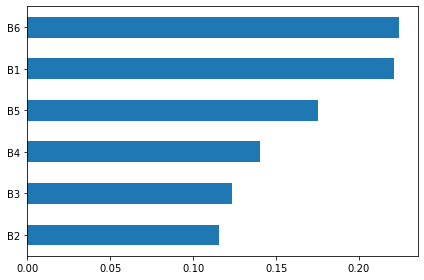

In [10]:
_ = pre_post_classifier.random_forest(trainX=pre_post_dataset.trainX, trainY=pre_post_dataset.trainY, 
                         testX=pre_post_dataset.testX, testY=pre_post_dataset.testY, 
                         grid_search=False, train=True, 
                         n_estimators = 100, max_depth=10, 
                         feature_importance=True)

## Using all post-harvest classes for training and all pre-harvest for testing

In [11]:
post_pre_classifier = Classifier(savepath = "./outputs_sergio/cross_post_pre",
                        bands = ["B1","B2","B3","B4","B5","B6"])
post_pre_dataset = Dataset(post_X, pre_X, post_y, pre_y, 
                      classes = ['Shrub', 'Graminoid', 'Bare Ground', 'Shade', 'Other'])
post_pre_dataset.info()

No. of classes: 5
Class labels: ['Shrub', 'Graminoid', 'Bare Ground', 'Shade', 'Other']
Total data samples: 11320
Train samples: 5525
	 0:Shrub = 1105
	 1:Graminoid = 1105
	 2:Bare Ground = 1105
	 3:Shade = 1105
	 4:Other = 1105
Test stats: 5795
	 0:Shrub = 1159
	 1:Graminoid = 1159
	 2:Bare Ground = 1159
	 3:Shade = 1159
	 4:Other = 1159



Random Forest
Elapsed_time training  0.684664 
Accuracy on train Set: 
0.8783710407239819
Accuracy on Test Set: 
0.7839516824849008
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1159
           1       0.69      0.40      0.50      1159
           2       0.61      0.80      0.69      1159
           3       0.82      0.92      0.87      1159
           4       0.89      0.84      0.86      1159

    accuracy                           0.78      5795
   macro avg       0.79      0.78      0.77      5795
weighted avg       0.79      0.78      0.77      5795

Confusion Matrix: 
[[1111    9    1   38    0]
 [  39  462  543   87   28]
 [   0  157  927    5   70]
 [  37   12   18 1072   20]
 [   6   34   36  112  971]]


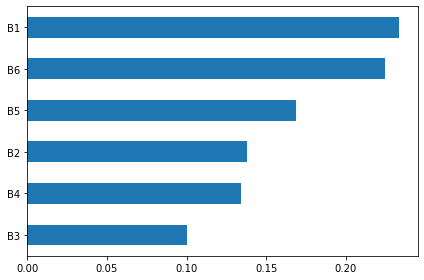

In [12]:
_ = post_pre_classifier.random_forest(trainX=post_pre_dataset.trainX, trainY=post_pre_dataset.trainY, 
                         testX=post_pre_dataset.testX, testY=post_pre_dataset.testY, 
                         grid_search=False, train=True, 
                         n_estimators = 100, max_depth=10, 
                         feature_importance=True)


Random Forest
Elapsed_time training  0.036468 
Accuracy on train Set: 
0.7847963800904978
Accuracy on Test Set: 
0.7577221742881795
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1159
           1       0.67      0.45      0.54      1159
           2       0.65      0.86      0.74      1159
           3       0.69      0.95      0.80      1159
           4       0.95      0.60      0.73      1159

    accuracy                           0.76      5795
   macro avg       0.78      0.76      0.75      5795
weighted avg       0.78      0.76      0.75      5795

Confusion Matrix: 
[[1089   14    0   56    0]
 [  54  520  475  103    7]
 [   1  145  992    3   18]
 [  18   32    2 1097   10]
 [   5   66   56  339  693]]


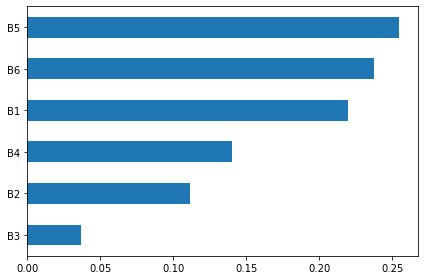

In [13]:
_ = post_pre_classifier.random_forest(trainX=post_pre_dataset.trainX, trainY=post_pre_dataset.trainY, 
                         testX=post_pre_dataset.testX, testY=post_pre_dataset.testY, 
                         grid_search=False, train=True, 
                         n_estimators = 5, max_depth=5, 
                         feature_importance=True)

In [14]:
post_prediction = post_pre_classifier.get_labels(post_tiff,"/estimator.sav")

	Batch 1 of 16
	Batch 2 of 16
	Batch 3 of 16
	Batch 4 of 16
	Batch 5 of 16
	Batch 6 of 16
	Batch 7 of 16
	Batch 8 of 16
	Batch 9 of 16
	Batch 10 of 16
	Batch 11 of 16
	Batch 12 of 16
	Batch 13 of 16
	Batch 14 of 16
	Batch 15 of 16
	Batch 16 of 16


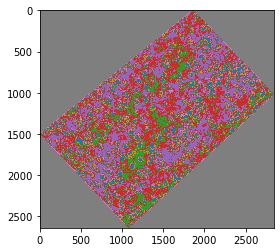

In [15]:
post_data.view_mask(post_prediction)

In [16]:
pre_prediction = post_pre_classifier.get_labels(pre_tiff,"/estimator.sav")

	Batch 1 of 16
	Batch 2 of 16
	Batch 3 of 16
	Batch 4 of 16
	Batch 5 of 16
	Batch 6 of 16
	Batch 7 of 16
	Batch 8 of 16
	Batch 9 of 16
	Batch 10 of 16
	Batch 11 of 16
	Batch 12 of 16
	Batch 13 of 16
	Batch 14 of 16
	Batch 15 of 16
	Batch 16 of 16


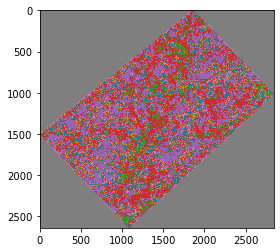

In [17]:
pre_data.view_mask(pre_prediction)

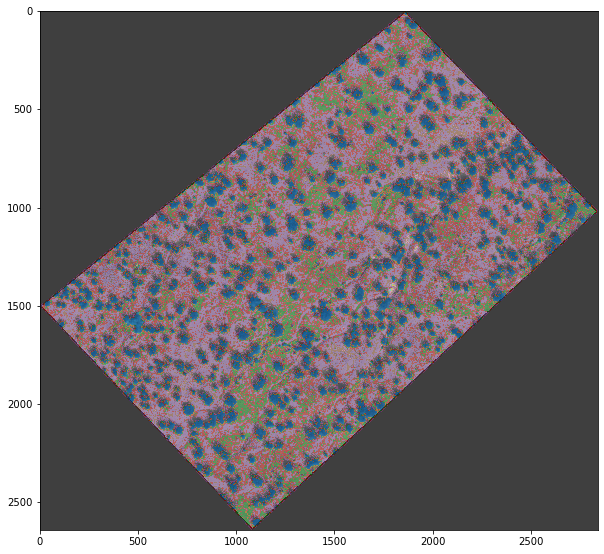

In [23]:
import matplotlib.pyplot as plt

image_np = pre_tiff.read()[[2,3,4],:,:].transpose(1,2,0)
image_np[image_np == -32767] = np.nan
minimum = np.nan_to_num(image_np).min(axis=(0,1))
maximum = np.nan_to_num(image_np).max(axis=(0,1))
plt.figure(figsize = (10,10))
image = (image_np - minimum ) / (maximum -minimum)
plt.imshow(image)
plt.imshow(pre_prediction, cmap = 'tab10', alpha=0.5)
plt.savefig("./pre_image_predicted.png")
plt.imsave("./pre_image.png", image)
plt.imsave("./pre_predicted.png", pre_prediction, cmap = 'tab10')

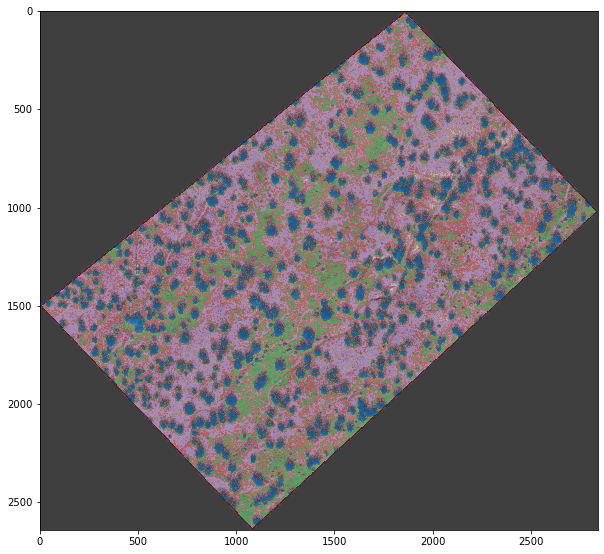

In [24]:
import matplotlib.pyplot as plt

image_np = post_tiff.read()[[2,3,4],:,:].transpose(1,2,0)
image_np[image_np == -32767] = np.nan
minimum = np.nan_to_num(image_np).min(axis=(0,1))
maximum = np.nan_to_num(image_np).max(axis=(0,1))
plt.figure(figsize = (10,10))
image = (image_np - minimum ) / (maximum -minimum)
plt.imshow(image)
plt.imshow(post_prediction, cmap = 'tab10', alpha=0.5)
plt.savefig("./post_image_predicted.png")
plt.imsave("./post_image.png", image)
plt.imsave("./post_predicted.png", post_prediction, cmap = 'tab10')

In [67]:
from collections import Counter

_values = Counter(list(post_prediction[np.invert(np.isnan(np.mean(image_np, axis=2)))]))
_total = sum(_values.values())
_classes = ['Shrub', 'Graminoid', 'Bare Ground', 'Shade', 'Other']

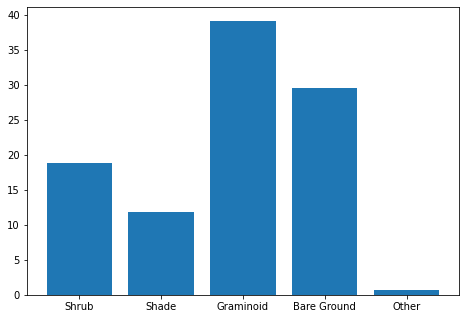

In [69]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x,y = [], []
for key, value in dict(_values).items():
    x.append(_classes[key-1])
    y.append(value/_total*100)
ax.bar(x,y)
plt.show()

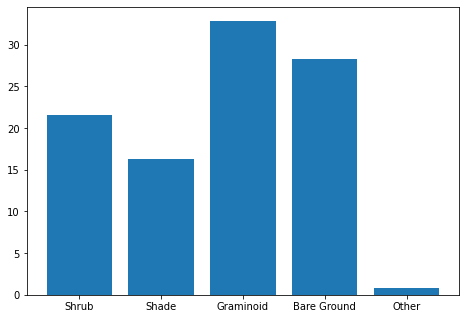

In [70]:
_values = Counter(list(pre_prediction[np.invert(np.isnan(np.mean(image_np, axis=2)))]))
_total = sum(_values.values())
_classes = ['Shrub', 'Graminoid', 'Bare Ground', 'Shade', 'Other']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x,y = [], []
for key, value in dict(_values).items():
    x.append(_classes[key-1])
    y.append(value/_total*100)
ax.bar(x,y)
plt.show()